<h1 align='center'><b><u>Clinical Data Analysis

### Problem Statement 1:

#### Visualization for No.of studies by each category of condition.

## Problem Statement 2:

#### Analyzing the data to get more insights from the Category "Cancers and Other Neoplasms" of studies with fields like: 
* condition 
* Age
* Gender
* Location
* Interventional

post which we can Predict cancer rate for the next 5 years.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
data = pd.read_csv('Cancer Analytics.csv')
print(data.shape)
data.head()

(6687, 3)


,Category,Condition,No_of_studies
0,Bacterial and Fungal Diseases,Abdominal Abscess,34
1,Bacterial and Fungal Diseases,"Abortion, Septic",3
2,Bacterial and Fungal Diseases,Abscess,213
3,Bacterial and Fungal Diseases,Acinetobacter Infections,7
4,Bacterial and Fungal Diseases,AIDS-Related Opportunistic Infections,176


In [3]:
df = pd.read_csv('final.csv')
print(df.shape)
df.head()

(2273047, 7)


,Lower_age,Upper_age,Gender,Conditions,Country,State,Interventions
0,18,150,Female,Neoplasms,United States,New Jersey,"Drug: Aflibercept (ziv-aflibercept, AVE0005, V..."
1,18,101,Female,Breast Cancers,United States,New York,Behavioral: Mindfulness based meditation program
2,16,150,All,Solid Tumors,United Kingdom,County Antrim,Drug: ALM201
3,40,90,All,Colorectal Neoplasms,United States,California,Device: Stool Sample Collection Kit
4,18,150,All,Colorectal Cancer,Netherlands,Groningen,Drug: Tivozanib (AV-951) plus FOLFOX6


### Problem Statement 1:

#### Visualization for No.of studies by each category of condition.

In [4]:
first = data[['Category', 'No_of_studies']].groupby(by='Category').sum().reset_index()
first = first.sort_values(by='No_of_studies')

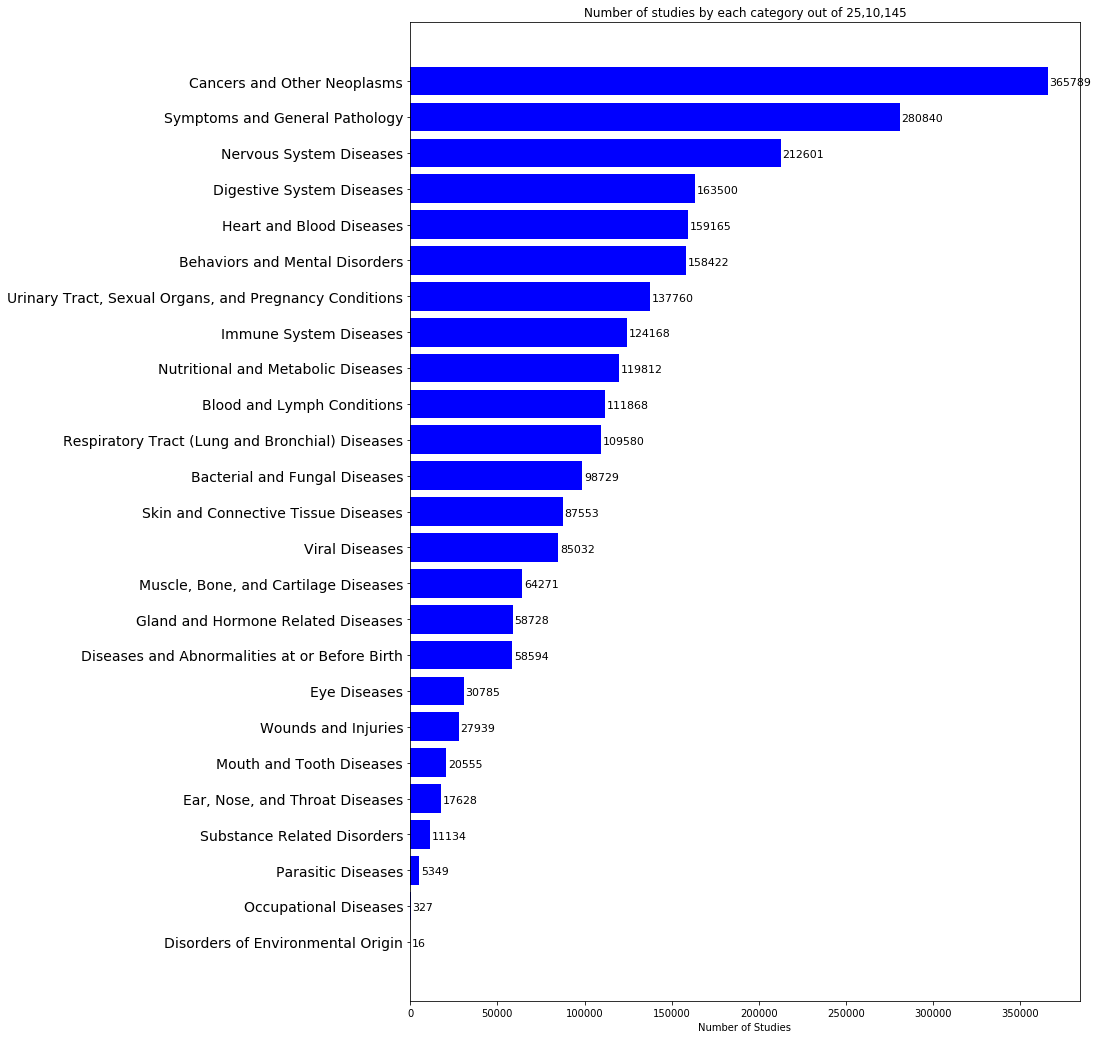

In [5]:
ind = np.arange(first.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, first.No_of_studies.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(first.Category.values, rotation='horizontal', fontsize=14)
ax.set_xlabel("Number of Studies")
ax.set_title("Number of studies by each category out of 25,10,145")
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+1000, i.get_y()+.28, \
            str(round((i.get_width()), 2)), fontsize=11, color='black')
plt.show()


Here, we can see <b><i>"Cancers and Other Neoplasms"</i></b> has the maximum number of studies as compared to others (i.e., 3,65,789 out of 25,10,145 studies)

## Problem Statement 2:

#### Analyzing the data to get more insights from the Category "Cancers and Other Neoplasms" of studies with fields like 
* condition 
* Age
* Gender
* Location

post which we can Predict cancer rate for the next 5 years.

### 1. Conditions/Diseases wise analysis

In [6]:
top_cond = df.Conditions.value_counts()[:10].reset_index()
top_cond.columns = ['Conditions', 'No_of_studies']
top_cond

,Conditions,No_of_studies
0,Breast Cancer,49115
1,Stage IIIA Non-Small Cell Lung Cancer AJCC v7,19841
2,Stage IIB Non-Small Cell Lung Carcinoma AJCC v7,19650
3,Stage IB Non-Small Cell Lung Carcinoma AJCC v7,19634
4,Stage IIA Non-Small Cell Lung Carcinoma AJCC v7,19634
5,Stage IIIC Breast Cancer AJCC v7,19431
6,Progesterone Receptor Negative,19399
7,Estrogen Receptor Negative,19327
8,Colorectal Cancer,19291
9,Prostate Cancer,18649


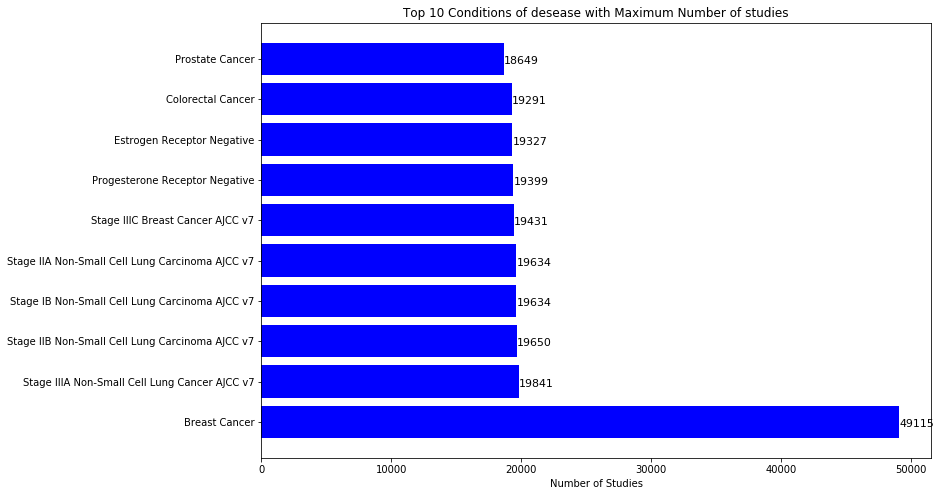

In [7]:
ind = np.arange(top_cond.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,8))
rects = ax.barh(ind, top_cond.No_of_studies.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(top_cond.Conditions.values, rotation='horizontal')
ax.set_xlabel("Number of Studies")
ax.set_title("Top 10 Conditions of desease with Maximum Number of studies")
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+10, i.get_y()+.28, \
            str(round((i.get_width()), 2)), fontsize=11, color='black')
plt.show()

<b><i>"Breast Cancer"</i></b> is the disease which has maximum number of studies so we can say that <b><i>"Breast Cancer"</i></b> is the most common cancer which people are suffering. 

Let's explore the data only for breast cancer disease

In [8]:
test = df[df.Conditions == 'Breast Cancer']

In [9]:
df1 = test.Country.value_counts().reset_index()[:10]
df1.columns = ['Country', 'No_of_studies']
df1

,Country,No_of_studies
0,United States,32410
1,France,2346
2,Germany,1689
3,Canada,1304
4,United Kingdom,1301
5,Spain,1272
6,Italy,981
7,Japan,725
8,Australia,635
9,China,499


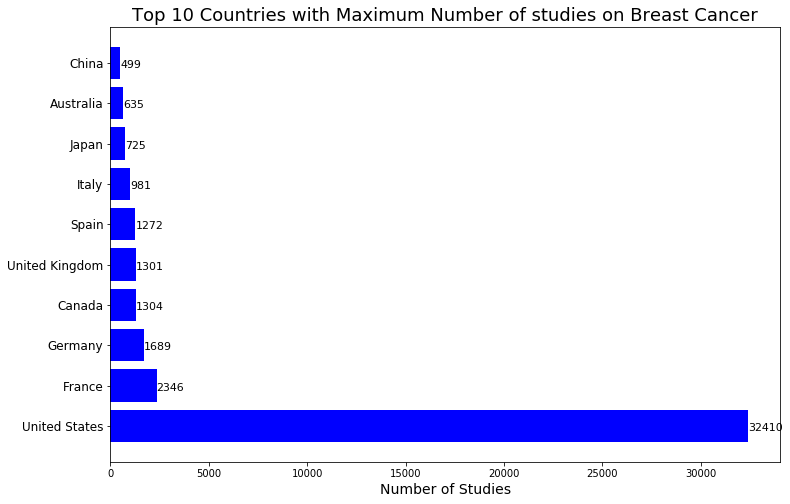

In [10]:
ind = np.arange(df1.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,8))
rects = ax.barh(ind, df1.No_of_studies.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(df1.Country.values, rotation='horizontal', fontsize=12)
ax.set_xlabel("Number of Studies", fontsize=14)
ax.set_title("Top 10 Countries with Maximum Number of studies on Breast Cancer", fontsize=18)
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+0.5, i.get_y()+.28, \
            str(round((i.get_width()), 2)), fontsize=11, color='black')
plt.show()

<b><i>"United States"</i></b> is the most involving country on study of <b><i>"Breast Cancer"</i></b> disease

In [11]:
df6 = df.Country.value_counts().reset_index()[:10]
df6.columns = ['Country', 'No_of_studies']
df6

,Country,No_of_studies
0,United States,2133286
1,Canada,23014
2,France,17102
3,United Kingdom,13403
4,Germany,9494
5,Italy,8412
6,Spain,7325
7,Australia,7137
8,Japan,5666
9,Puerto Rico,4933


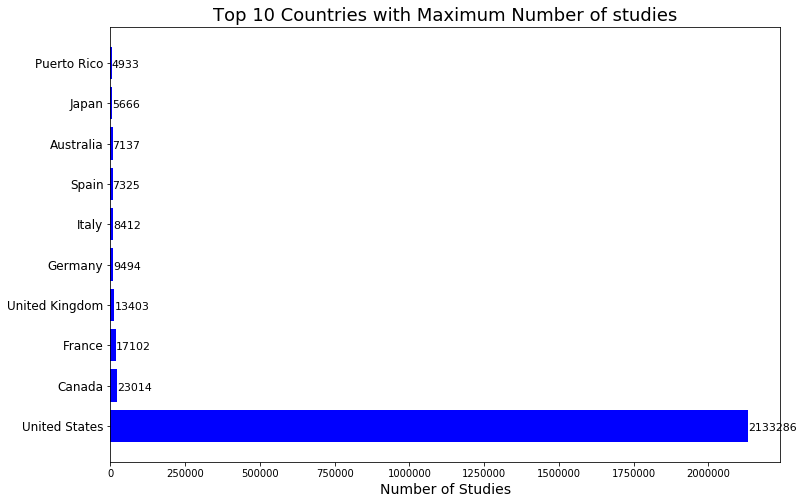

In [12]:
ind = np.arange(df6.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,8))
rects = ax.barh(ind, df6.No_of_studies.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(df6.Country.values, rotation='horizontal', fontsize=12)
ax.set_xlabel("Number of Studies", fontsize=14)
ax.set_title("Top 10 Countries with Maximum Number of studies", fontsize=18)
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+0.5, i.get_y()+.28, \
            str(round((i.get_width()), 2)), fontsize=11, color='black')
plt.show()

In general, <b><i>"United States"</i></b> involved most in studies as compared to other countries

In [13]:
df2 = test[test.Country == 'United States'].State.value_counts()[:10].reset_index()
df2.columns = ['State', 'No_of_studies']
df2

,State,No_of_studies
0,Ohio,2739
1,California,2549
2,Illinois,2315
3,Michigan,1883
4,Kansas,1378
5,Minnesota,1303
6,Pennsylvania,1164
7,New York,1157
8,Washington,1138
9,Wisconsin,1137


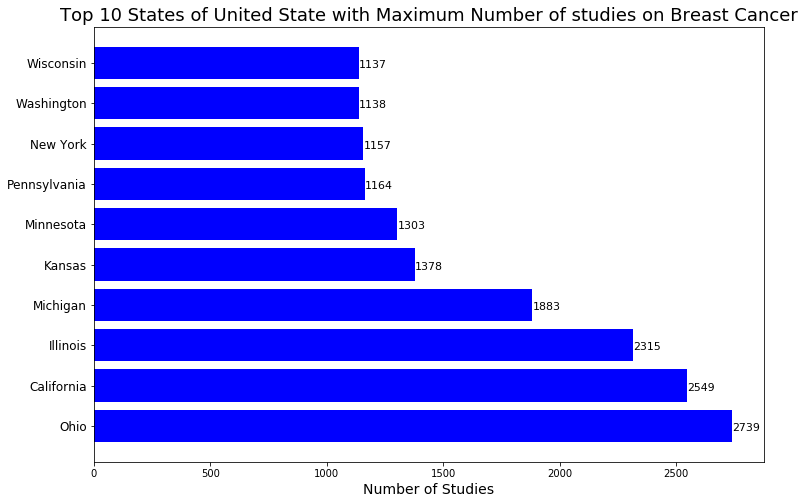

In [14]:
ind = np.arange(df2.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,8))
rects = ax.barh(ind, df2.No_of_studies.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(df2.State.values, rotation='horizontal', fontsize=12)
ax.set_xlabel("Number of Studies", fontsize=14)
ax.set_title("Top 10 States of United State with Maximum Number of studies on Breast Cancer", fontsize=18)
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+0.5, i.get_y()+.28, \
            str(round((i.get_width()), 2)), fontsize=11, color='black')
plt.show()

In <b><i>"United States"</i></b>, <b><i>"Ohio"</i></b> state has maximum number studies on <b><i>"Breast Cancer"</i></b>

In [15]:
df3 = test.Gender.value_counts().reset_index()
df3.columns = ['Gender', 'No_of_stories']
df3

,Gender,No_of_stories
0,Female,29786
1,All,19329


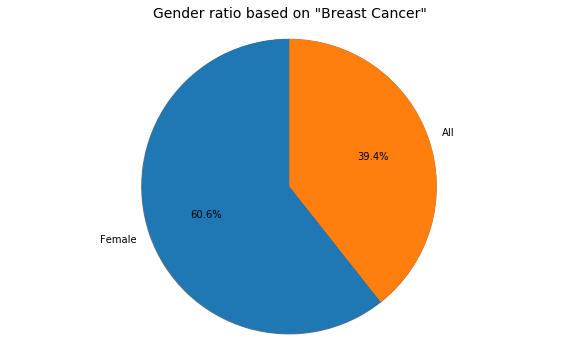

In [16]:
fig1, ax1 = plt.subplots(figsize=(10,6))
ax1.pie(df3['No_of_stories'].values, labels=df3.Gender.values, shadow=True, autopct='%1.1f%%', startangle=90, radius=10)
ax1.axis('equal')
ax1.set_title('Gender ratio based on "Breast Cancer"', fontsize=14)
plt.show()

Not a single <b><i>"Breast Cancer"</i></b> disease is only for male, either it has only for <b><i>"Females"</i></b> or for <b><i>"All Genders"</i></b>

In [17]:
df7 = df.Interventions.value_counts().reset_index()[:10]
df7.columns = ['Interventions', 'No_of_studies']
df7

,Interventions,No_of_studies
0,Other: Laboratory Biomarker Analysis,282389
1,Other: Quality-of-Life Assessment,95638
2,Biological: Nivolumab,87102
3,Biological: Ipilimumab,83832
4,Procedure: Biospecimen Collection,74863
5,Biological: Bevacizumab,73376
6,Other: Questionnaire Administration,66165
7,Drug: Docetaxel,65154
8,Drug: Cisplatin,63462
9,Drug: Carboplatin,61427


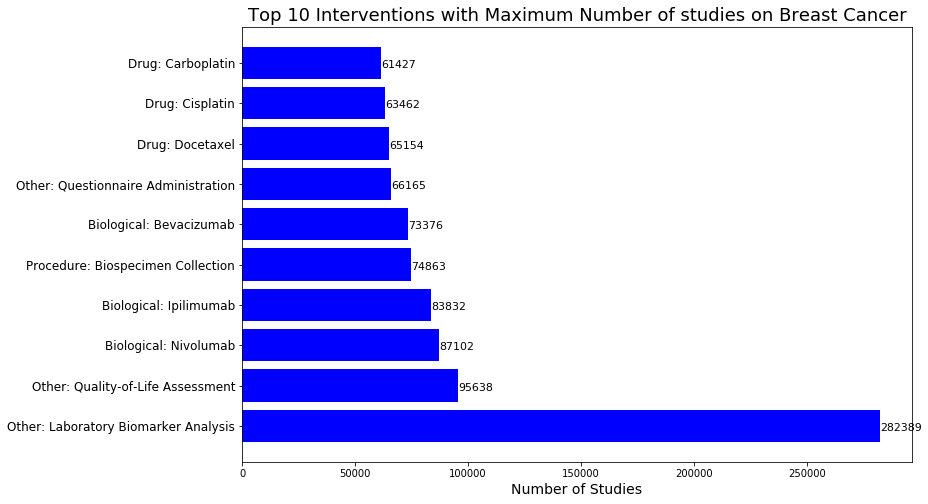

In [18]:
ind = np.arange(df7.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,8))
rects = ax.barh(ind, df7.No_of_studies.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(df7.Interventions.values, rotation='horizontal', fontsize=12)
ax.set_xlabel("Number of Studies", fontsize=14)
ax.set_title("Top 10 Interventions with Maximum Number of studies on Breast Cancer", fontsize=18)
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+0.5, i.get_y()+.28, \
            str(round((i.get_width()), 2)), fontsize=11, color='black')
plt.show()

In [19]:
l = []
for i in range(df.shape[0]):
    l.append(str(df['Lower_age'][i]) + ' to ' + str(df['Upper_age'][i]))
    
df['Age_group'] = l
df.head()    

,Lower_age,Upper_age,Gender,Conditions,Country,State,Interventions,Age_group
0,18,150,Female,Neoplasms,United States,New Jersey,"Drug: Aflibercept (ziv-aflibercept, AVE0005, V...",18 to 150
1,18,101,Female,Breast Cancers,United States,New York,Behavioral: Mindfulness based meditation program,18 to 101
2,16,150,All,Solid Tumors,United Kingdom,County Antrim,Drug: ALM201,16 to 150
3,40,90,All,Colorectal Neoplasms,United States,California,Device: Stool Sample Collection Kit,40 to 90
4,18,150,All,Colorectal Cancer,Netherlands,Groningen,Drug: Tivozanib (AV-951) plus FOLFOX6,18 to 150


In [20]:
df8 = df.Age_group.value_counts().reset_index()[:10]
df8.columns = ['Age_group', 'No_of_studies']
df8

,Age_group,No_of_studies
0,18 to 150,1898769
1,12 to 21,74720
2,19 to 150,33011
3,50 to 150,27753
4,18 to 120,26071
5,21 to 150,22300
6,2 to 30,16512
7,12 to 150,15923
8,18 to 99,13800
9,70 to 150,13288


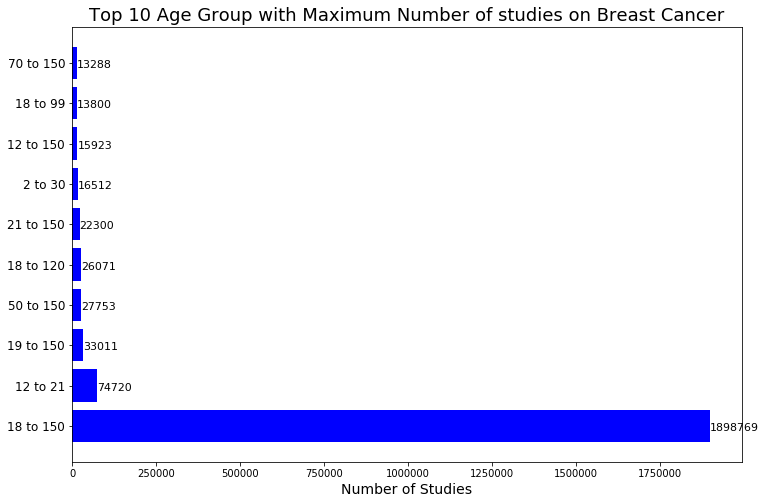

In [21]:
ind = np.arange(df8.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,8))
rects = ax.barh(ind, df8.No_of_studies.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(df8.Age_group.values, rotation='horizontal', fontsize=12)
ax.set_xlabel("Number of Studies", fontsize=14)
ax.set_title("Top 10 Age Group with Maximum Number of studies on Breast Cancer", fontsize=18)
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+0.5, i.get_y()+.28, \
            str(round((i.get_width()), 2)), fontsize=11, color='black')
plt.show()

### 2. Gender wise analysis

In [22]:
gender = df['Gender'].value_counts().reset_index()
gender.columns = ['Gender', 'No_of_stories']
gender

,Gender,No_of_stories
0,All,1609227
1,Female,605348
2,Male,58472


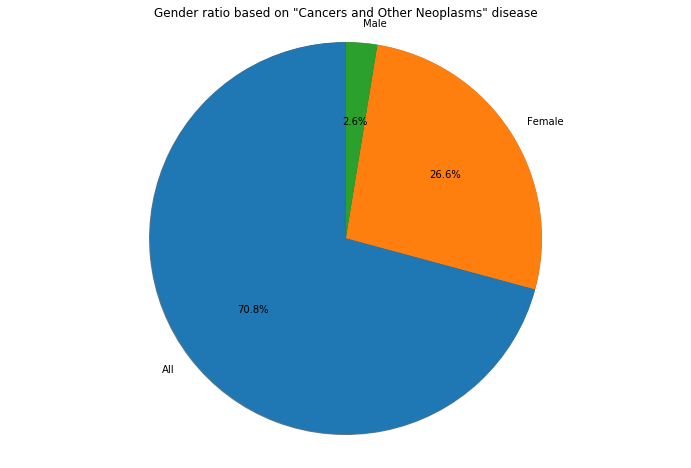

In [23]:
fig1, ax1 = plt.subplots(figsize=(12,8))
ax1.pie(gender['No_of_stories'].values, labels=gender.Gender.values, shadow=True, autopct='%1.1f%%', startangle=90, radius=10)
ax1.axis('equal')
ax1.set_title('Gender ratio based on "Cancers and Other Neoplasms" disease')
plt.show()

Very less number of <b><i>"Cancers"</i></b> are only for <b><i>"Males"</i></b>, maximum number of <b><i>"Cancer"</i></b> disease are for <b><i>"All Genders"</i></b>

Let's explore it by gender wise...

In [24]:
df4 = df[df.Gender == 'Female'].Conditions.value_counts()[:10].reset_index()
df4.columns = ['Conditions', 'No_of_studies']
df4

,Conditions,No_of_studies
0,Breast Cancer,29786
1,Primary Peritoneal Serous Adenocarcinoma,16158
2,Ovarian Serous Adenocarcinoma,15469
3,HER2/Neu Positive,13567
4,Fallopian Tube Endometrioid Adenocarcinoma,11538
5,Estrogen Receptor Positive,11490
6,Fallopian Tube Clear Cell Adenocarcinoma,11438
7,Recurrent Breast Carcinoma,11400
8,Stage IIIC Breast Cancer AJCC v7,11342
9,Ovarian Endometrioid Adenocarcinoma,11337


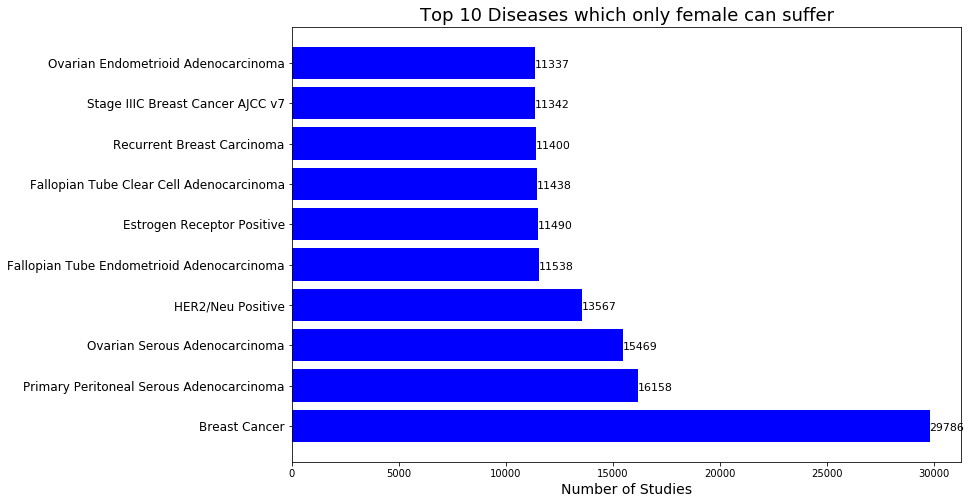

In [25]:
ind = np.arange(df4.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,8))
rects = ax.barh(ind, df4.No_of_studies.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(df4.Conditions.values, rotation='horizontal', fontsize=12)
ax.set_xlabel("Number of Studies", fontsize=14)
ax.set_title("Top 10 Diseases which only female can suffer", fontsize=18)
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+0.5, i.get_y()+.28, \
            str(round((i.get_width()), 2)), fontsize=11, color='black')
plt.show()

So, <b><i>"Females"</i></b> are facing <b><i>"Breast Cancer"</i></b> most as compared to other disease

In [26]:
df5 = df[df.Gender == 'Male'].Conditions.value_counts()[:10].reset_index()
df5.columns = ['Conditions', 'No_of_studies']
df5

,Conditions,No_of_studies
0,Prostate Cancer,17048
1,Metastatic Cancer,3790
2,Castration Levels of Testosterone,2719
3,Castration-Resistant Prostate Carcinoma,2713
4,Prostate Carcinoma Metastatic in the Bone,2600
5,Stage IV Prostate Adenocarcinoma AJCC v7,2562
6,Metastatic Prostate Carcinoma in the Soft Tissue,2501
7,Prostate Adenocarcinoma,2273
8,Stage III Prostate Adenocarcinoma,1625
9,Stage IV Prostate Cancer,1330


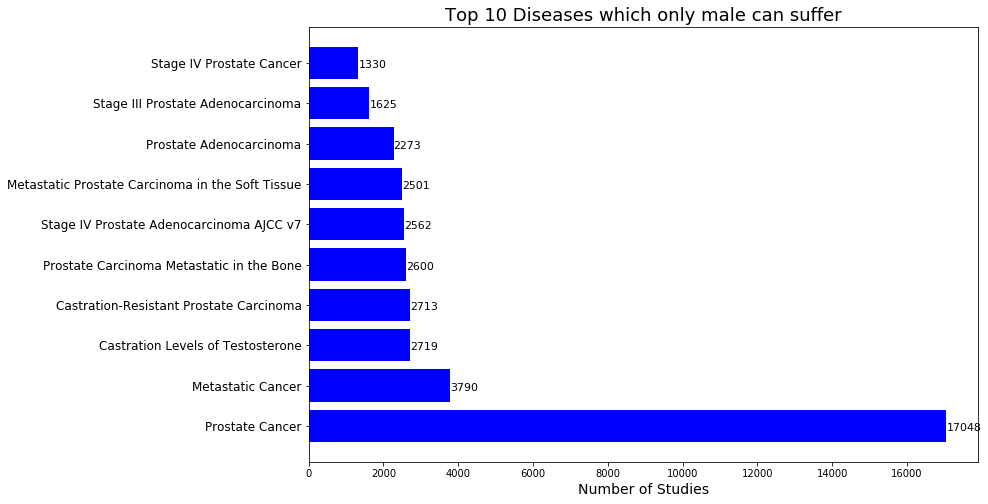

In [27]:
ind = np.arange(df5.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,8))
rects = ax.barh(ind, df5.No_of_studies.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(df5.Conditions.values, rotation='horizontal', fontsize=12)
ax.set_xlabel("Number of Studies", fontsize=14)
ax.set_title("Top 10 Diseases which only male can suffer", fontsize=18)
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+0.5, i.get_y()+.28, \
            str(round((i.get_width()), 2)), fontsize=11, color='black')
plt.show()

So, <b><i>"Males"</i></b> are facing <b><i>"Prostate Cancer"</i></b> most as compared to other disease

### 3. Age wise Analysis

In [28]:
df9 = df[(df.Lower_age > 0) & (df.Upper_age < 10)].Conditions.value_counts().reset_index()
df9.columns = ['Conditions', 'No_of_studies']
df9

,Conditions,No_of_studies
0,Leukemia,1230
1,Incisional Hernia,4
2,Hernia of Abdominal Wall,4
3,"Brain Tumor, Pediatric",1
4,"Solid Tumor, Childhood",1


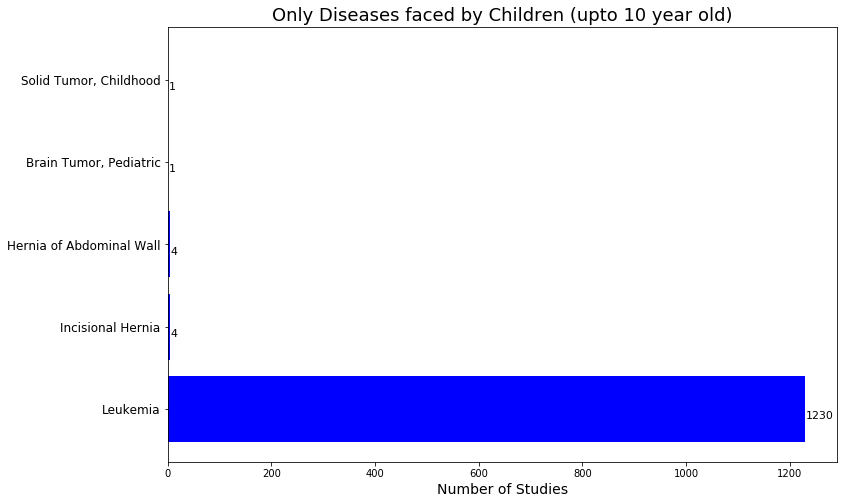

In [29]:
ind = np.arange(df9.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,8))
rects = ax.barh(ind, df9.No_of_studies.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(df9.Conditions.values, rotation='horizontal', fontsize=12)
ax.set_xlabel("Number of Studies", fontsize=14)
ax.set_title("Only Diseases faced by Children (upto 10 year old)", fontsize=18)
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+0.5, i.get_y()+.28, \
            str(round((i.get_width()), 2)), fontsize=11, color='black')
plt.show()

In [30]:
df10 = df[(df.Lower_age >= 120) & (df.Upper_age < 200)].Conditions.value_counts().reset_index()
df10.columns = ['Conditions', 'No_of_studies']
df10

,Conditions,No_of_studies
0,Breast Cancer,1837
1,Pain,1660
2,Musculoskeletal Complications,1428
3,Weight Changes,232
4,Psychosocial Effects of Cancer and Its Treatment,232
5,Depression,232
6,Cognitive/Functional Effects,232
7,Fatigue,232
8,Anxiety Disorder,232
9,Colorectal Cancer,232


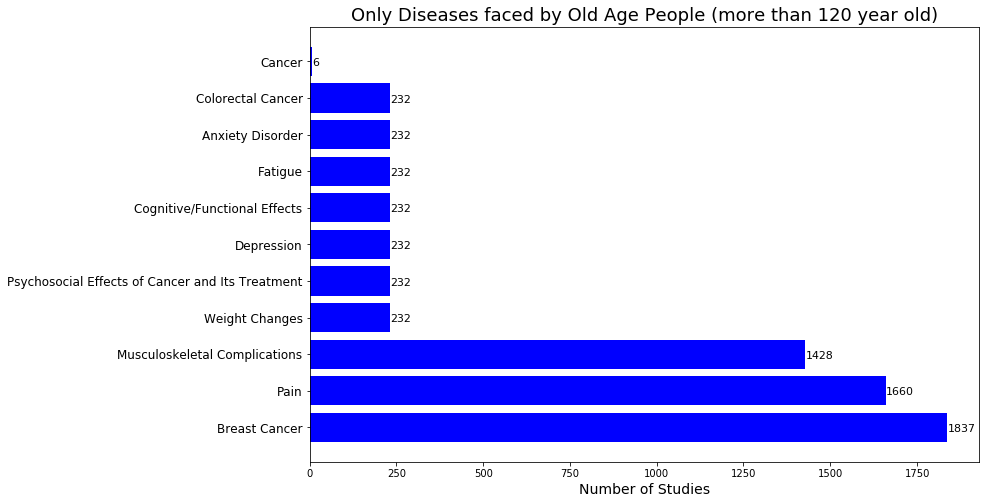

In [31]:
ind = np.arange(df10.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,8))
rects = ax.barh(ind, df10.No_of_studies.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(df10.Conditions.values, rotation='horizontal', fontsize=12)
ax.set_xlabel("Number of Studies", fontsize=14)
ax.set_title("Only Diseases faced by Old Age People (more than 120 year old)", fontsize=18)
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+0.5, i.get_y()+.28, \
            str(round((i.get_width()), 2)), fontsize=11, color='black')
plt.show()